# region_surface_areas
An example for the use of porespy.metrics.region_surface_areas

Extracts the surface area of each region in a labeled image.

### Import packages

In [1]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

### Create image and variables:

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  68
Peaks after trimming saddle points:  67
Peaks after trimming nearby peaks:  65


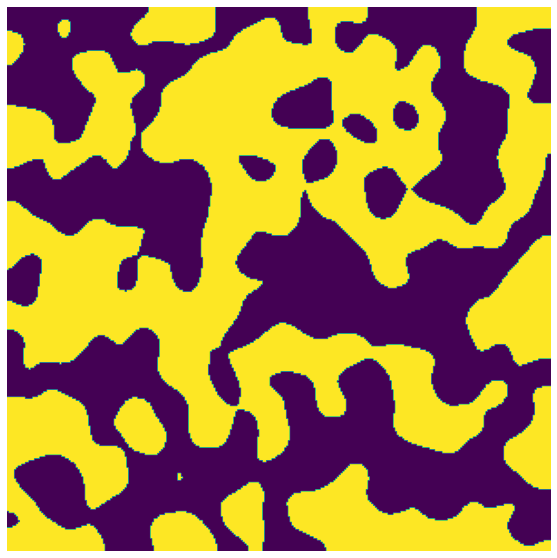

In [2]:
skel = ps.generators.blobs(shape=[300, 300])
branch_points = None
iterations = 10
im = ps.filters.prune_branches(skel, branch_points, iterations)
r = ps.filters.snow_partitioning(
    im, dt=None, r_max=4, sigma=0.4, return_all=True, mask=True, randomize=True
)
regions = r.regions

#default values:
voxel_size = 1
strel = None

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

### Apply metric function:

Output is a list of the surface ares of each region

In [3]:
x = ps.metrics.region_surface_areas(regions, voxel_size, strel)
xx = ps.metrics.region_surface_areas(regions, voxel_size, strel)

------------------------------------------------------------
Finding surface area of each region
100%|██████████| 65/65 [00:00<00:00, 330.51it/s]
------------------------------------------------------------
Finding surface area of each region
100%|██████████| 65/65 [00:00<00:00, 673.93it/s]


#

Plot results:

Text(0.5, 1.0, 'voxel_size = 10')

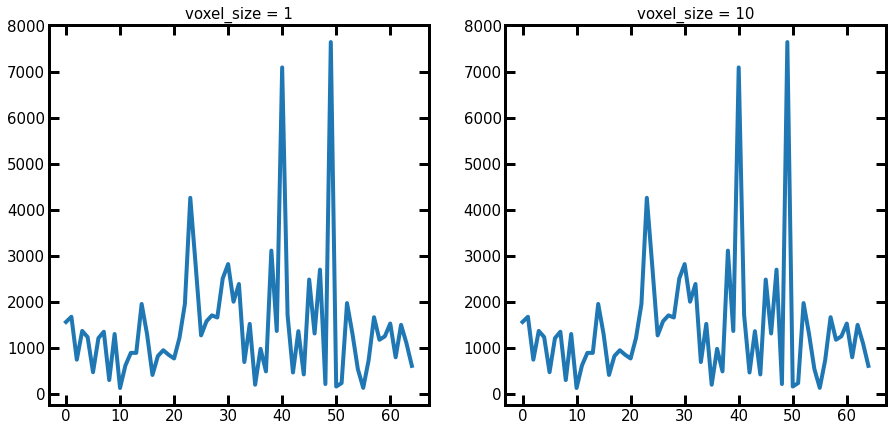

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x)
ax[1].plot(xx)
ax[0].set_title("voxel_size = 1")
ax[1].set_title("voxel_size = 10")